# Clustering de Series de Tiempo

In [69]:
import pandas as pd
pd.core.common.is_list_like=pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from datetime import datetime
from sklearn.cluster import KMeans

In [75]:
# Descargar los datos de la serie de tiempo
start=datetime(2019,9,25)
end=datetime(2020,3,1)
data=web.YahooDailyReader(symbols="MSFT",start=start,end=end,interval="d").read()
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-25,139.960007,136.029999,137.500000,139.360001,21382000.0,138.509079
2019-09-26,140.179993,138.440002,139.440002,139.539993,17456600.0,138.687973
2019-09-27,140.360001,136.649994,140.149994,137.729996,22477700.0,136.889023
2019-09-30,139.220001,137.779999,138.050003,139.029999,17280900.0,138.181091
2019-10-01,140.250000,137.000000,139.660004,137.070007,21466600.0,136.233078


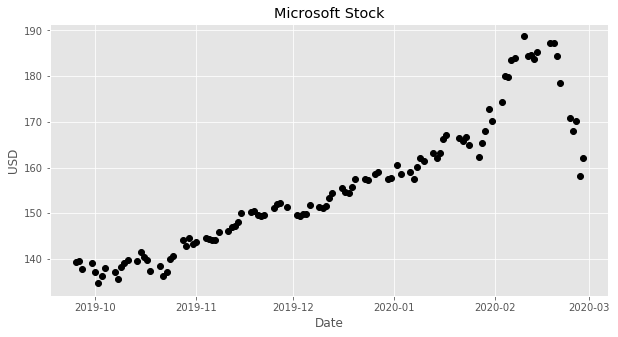

In [76]:
# Visualización de la serie de tiempo
plt.figure(figsize=(10,5))
plt.plot(data["Close"],"ko")
plt.title("Microsoft Stock")
plt.xlabel("Date")
plt.ylabel("USD")
plt.show()

In [77]:
data=np.array(data["Adj Close"])
data

array([138.50907898, 138.68797302, 136.88902283, 138.18109131,
       136.233078  , 133.82783508, 135.44789124, 137.27664185,
       136.28276062, 134.84161377, 137.3959198 , 138.25067139,
       138.82711792, 138.69792175, 140.70559692, 139.55267334,
       138.83706665, 136.57098389, 137.58474731, 135.53733826,
       136.40203857, 139.08555603, 139.87071228, 143.30960083,
       141.957901  , 143.72703552, 142.49458313, 142.84246826,
       143.66740417, 143.57795715, 143.18037415, 143.37915039,
       145.06878662, 145.21786499, 146.17201233, 146.41053772,
       147.15596008, 149.05430603, 149.42204285, 149.47172546,
       149.21243286, 149.07281494, 149.18252563, 150.8180542 ,
       151.61587524, 151.90509033, 150.96765137, 149.14263916,
       148.90328979, 149.44181824, 149.52159119, 151.3366394 ,
       150.94770813, 150.71833801, 151.28677368, 152.82258606,
       154.10906982, 155.1063385 , 154.26863098, 153.94950867,
       155.28585815, 156.98123169, 156.98123169, 156.95

In [78]:
ventana=6
matriz=[]
for i in range(len(data)):
    matriz.append(data[i:(i+ventana)])

matriz=pd.DataFrame(matriz)
matriz.dropna(inplace=True)
matriz

,0,1,2,3,4,5
0,138.509079,138.687973,136.889023,138.181091,136.233078,133.827835
1,138.687973,136.889023,138.181091,136.233078,133.827835,135.447891
2,136.889023,138.181091,136.233078,133.827835,135.447891,137.276642
3,138.181091,136.233078,133.827835,135.447891,137.276642,136.282761
4,136.233078,133.827835,135.447891,137.276642,136.282761,134.841614
5,133.827835,135.447891,137.276642,136.282761,134.841614,137.395920
6,135.447891,137.276642,136.282761,134.841614,137.395920,138.250671
7,137.276642,136.282761,134.841614,137.395920,138.250671,138.827118
8,136.282761,134.841614,137.395920,138.250671,138.827118,138.697922
9,134.841614,137.395920,138.250671,138.827118,138.697922,140.705597


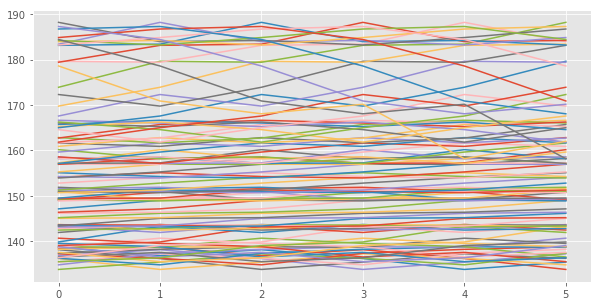

In [90]:
plt.figure(figsize=(10,5))
plt.plot(matriz.transpose());

In [83]:
matriz=np.array(matriz)

In [84]:
# Estandarizar los datos
tmp=matriz.transpose()
tmp=(tmp-tmp.mean(axis=0))/tmp.std(axis=0)
data_newstd=tmp.transpose()

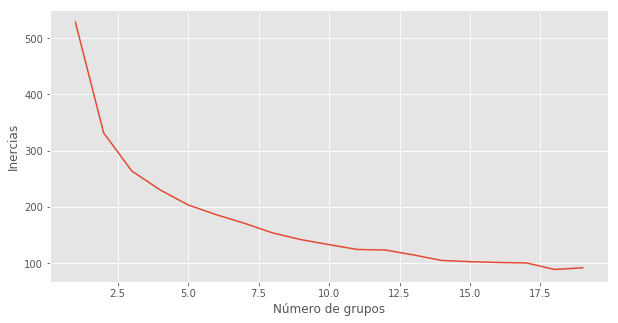

In [91]:
# Criterio de selección
nk=20
n_clusters=np.arange(1,nk)
inercias=np.zeros(nk-1)

for k in n_clusters:
    model=KMeans(n_clusters=k,init="random").fit(data_newstd)
    inercias[k-1]=model.inertia_
    
# Dibujar la gráfica del codo
plt.figure(figsize=(10,5))
plt.plot(n_clusters,inercias)
plt.xlabel("Número de grupos")
plt.ylabel("Inercias")
plt.show()

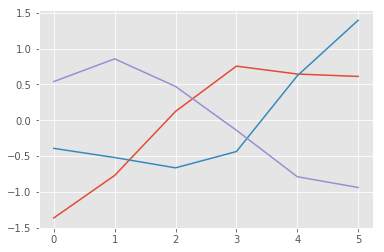

In [92]:
model=KMeans(n_clusters=3,init="k-means++").fit(data_newstd)
grupos=model.predict(data_newstd)
centroides=model.cluster_centers_
plt.plot(centroides.transpose())

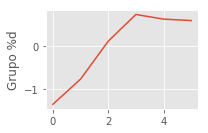

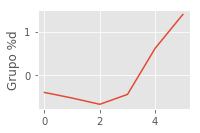

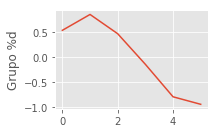

In [97]:
# Dibujar grupos con sus etiquetas
nsubfig=np.ceil(np.sqrt(len(np.unique(grupos))))

for k in np.unique(grupos):
    plt.subplot(nsubfig,nsubfig,k+1)
    plt.plot(centroides[k,:])
    plt.ylabel("Grupo %d")
    plt.show()

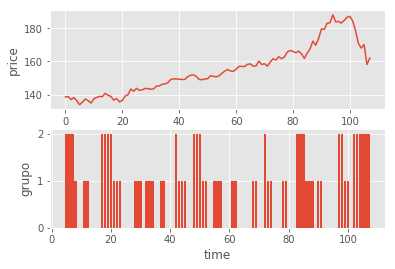

In [100]:
# Comparar la generación de los grupos con la serie original
plt.subplot(211)
plt.plot(data)
plt.xlabel("time")
plt.ylabel("price")

plt.subplot(212)
plt.bar(np.arange(5,len(data)),grupos)
plt.xlabel("time")
plt.ylabel("grupo")
plt.show()

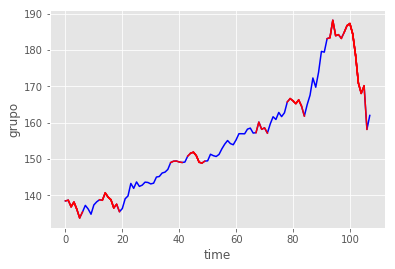

In [104]:
# Colorear la serie de tiempo
pos=np.arange(5,len(data))[grupos==2]
plt.plot(np.array(data),"b-")

for k in pos:
    plt.plot(np.arange(k-5,k),np.array(data[k-5:k]),"r-")
plt.xlabel("time")
plt.ylabel("grupo")
plt.show()